In [202]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from tqdm.notebook import tqdm
import random
from boxplot_2d import boxplot_2d
mpl.rcParams['axes.linewidth'] = 1.3
Z = 16
from scipy.optimize import curve_fit

In [203]:
def read_txt(fname):
    f = open(fname)
    fl = f.readlines()
    f.close()
    data = []
    for line in fl:
        if "#" not in line and "@" not in line and line != '\n':
            data.append(line.split())
    data = np.array(data, dtype='float')

    return data

In [204]:
fnames = {'AuNP2': 'data/NP2-Znsites.sfu',\
          'AuNP3': 'data/NP3-Znsites.sfu'}
sites = {key: read_txt(val) for key, val in fnames.items()}
keys = sites.keys()

57
16


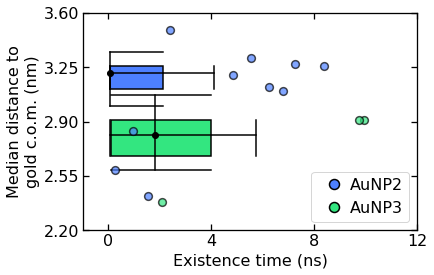

In [205]:
cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}

fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
ax.set_xlim(-1, 12)
ax.set_xticks(np.linspace(0, 12, 4))
ax.set_ylim(2.2, 3.6)
ax.set_yticks(np.linspace(2.2, 3.6, 5))
ax.set_xlabel("Existence time (ns)", fontsize=Z)
ax.set_ylabel("Median distance to\ngold c.o.m. (nm)", fontsize=Z)
for key in keys:
    data = sites[key]
    data = data[data[:,0]>50]
    n_pts = len(data)
    print(n_pts)
    boxplot_2d(data[:,0]/1000, data[:,1], ax=ax, c=cs[key], whis=1, lw=1.5, quartiles=[25,50,75])
    ax.errorbar(0, 0, ms=10, label=key.format(n_pts), color=cs[key], mew=1.5, mec='k', fmt='o')
ax.legend(fontsize=Z, handletextpad=0)
plt.show()
plt.close()

- Duration of the events is comparable for AuNP2 and AuNP3
- The Zinc bimetallic cluster appears at longer distances for AuNP2 than AuNP3
- This is consistent with the more compact packing of AuNP3
- This is also consistent with the enhanced catalytic capacity of AuNP2 since the bimetallic 'binding site' lie more exposed toward the solvent

AuNP2
N 7114
Quartile Value (nm)
	 0 1.96
	 5 2.78
	 10 2.96
	 25 3.06
	 50 3.15
	 75 3.23
	 95 3.34
	 100 3.51
AuNP3
N 2717
Quartile Value (nm)
	 0 1.71
	 5 2.62
	 10 2.69
	 25 2.82
	 50 2.94
	 75 3.01
	 95 3.09
	 100 3.32


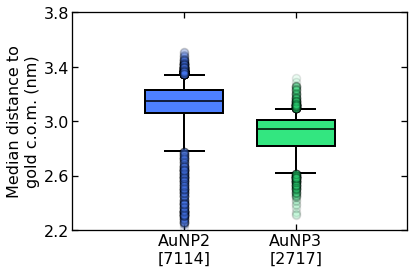

In [206]:
bp = dict(linestyle='-', lw=2, color='k', facecolor='r')
fp = dict(marker='o', ms=8, ls='none', mec='k', mew=1.5, alpha=0.1)
mp = dict(ls='-', lw=1.5, color='k')
cp = dict(ls='-', lw=2, color='k')
wp = dict(ls='-', lw=2, color='k')

cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}

fig, ax = plt.subplots(figsize=(6,4))
xtl = []
for k, key in enumerate(keys):
    data = sites[key]
    data = data[data[:,0]>0]
    n_pts = len(data)
    xtl.append(key+"\n[{}]".format(n_pts))
    print(key)
    print("N {:d}".format(n_pts))
    #print("N {:.2f} ns-1".format(n_pts/700))
    print("Quartile", "Value (nm)")
    for q in [0,5,10,25,50,75,95,100]:
        print("\t", q, np.quantile(data[:,1], q/100))
    bpl = ax.boxplot(data[:,1], positions=[k], whis=[5,95], widths=0.7, patch_artist=True, 
                     boxprops=bp, flierprops=fp, medianprops=mp, capprops=cp, whiskerprops=wp, vert=True)
    for box in bpl['boxes']:
        box.set_facecolor(cs[key])
    for flier in bpl['fliers']:
        flier.set_markerfacecolor(cs[key])
    #ax.errorbar(0, 0, ms=10, label=key+"\n(N={})".format(n_pts), color=cs[key], mew=1.5, mec='k', fmt='o')
#ax.legend(fontsize=Z-1, handletextpad=0, ncol=2, columnspacing=0.1, borderaxespad=1, borderpad=0.3, bbox_to_anchor=(0.0,0.73,1,0.3), loc='upper center')
ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
ax.set_xlim(-1, 2)
ax.set_xticks([0,1])
ax.set_xticklabels(xtl)
ax.set_ylim(2.2, 3.8)
ax.set_yticks(np.linspace(2.2, 3.8, 5))
ax.set_ylabel("Median distance to\ngold c.o.m. (nm)", fontsize=Z)
plt.savefig("Figures/Zn-dist.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()

- This plot shows better that the Zn bimetallic 'binding sites' are more eposed toward the solvent in AuNP2
- Also shows that there are a lot more binding sites in AuNP2 and AuNP3

In [207]:
def exponential(x, A, B):
    return A*np.exp(-B*x)

Fit ignores 0.0 ps

AuNP2
	 0 0.005
	 5 0.005
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.025
	 100 22.81
AuNP2 has 472 events longer than 0.02 ns
9369.6 e^(-131.039t)
AuNP3
	 0 0.005
	 5 0.005000000000000001
	 10 0.005
	 25 0.005
	 50 0.005
	 75 0.01
	 95 0.020000000000000004
	 100 9.94
AuNP3 has 93 events longer than 0.02 ns
3709.9 e^(-150.425t)


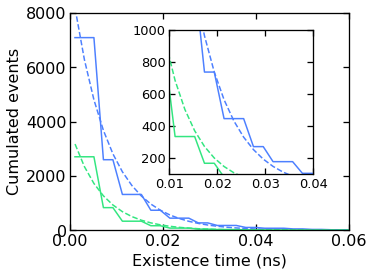

In [212]:
cs = {'AuNP2': (0.3,0.5,1),
      'AuNP3': (0.2,0.9,0.5)}

fil = 0.00
print("Fit ignores {} ps\n".format(fil*1000))
fig, ax = plt.subplots(figsize=(5,4), ncols=1)
times = np.linspace(fil,0.1, 50)
a = plt.axes([0.4,0.32,0.4,0.5])
a.tick_params(labelsize=Z-3, direction='in', size=6, width=1.3, which='major', right=True, top=True)        
a.set_xlim(0.01, 0.04)
a.set_ylim(100,1000)
for n, nano in enumerate([2,3]):
    key = "AuNP{}".format(nano)
    print(key)
    durations = sites[key][:,0]/1000
    durations = durations[durations>fil]
    for q in [0,5,10,25,50,75,95,100]:
        print("\t", q, np.quantile(durations, q/100))
    h, _ = np.histogram(durations, bins=times, density=False)
    cum = np.cumsum(np.flip(h))
    times_center = 0.5*(times[:-1] + times[1:])
    times_center = times_center[::-1]
    ax.plot(times_center, cum, c=cs[key])
    a.plot(times_center, cum, c=cs[key])
    popt,_ = curve_fit(exponential, times_center, cum, p0=(np.max(cum), 1))
    ax.plot(times_center, exponential(times_center,*popt), c=cs[key], ls='--')
    a.plot(times_center, exponential(times_center,*popt), c=cs[key], ls='--')
    fil2 = 0.02
    print("{} has {} events longer than {} ns".format(key, len(durations[durations>fil2]), fil2))
    print("{:.1f} e^(-{:.3f}t)".format(*popt))

ax.tick_params(labelsize=Z, direction='in', size=6, width=1.3, which='major', right=True, top=True)
ax.set_xlim(fil, 0.06)
ax.set_ylim(0,8000)
ax.set_xlabel("Existence time (ns)", fontsize=Z)
ax.set_ylabel("Cumulated events", fontsize=Z)
#ax.legend(fontsize=Z-1, handletextpad=0, ncol=1, columnspacing=0.1, borderaxespad=1, borderpad=0.4, bbox_to_anchor=(0.03,0.73,1,0.3))
plt.savefig("Figures/Zn-time.svg", format='svg', bbox_inches='tight')
plt.show()
plt.close()